In [ ]:
# Question: Train a LinearSVC on a linearly separable dataset.Then train an SVC and
# a SGDClassifier on the same dataset. See if you can get them to produce roughly the
#  same model.
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # Petal length and petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y ==1)
X = X[setosa_or_versicolor]
y  = y[setosa_or_versicolor]

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C= 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:            ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:         ",svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:             [0.28475098] [[1.05364854 1.09903804]]
SVC:          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


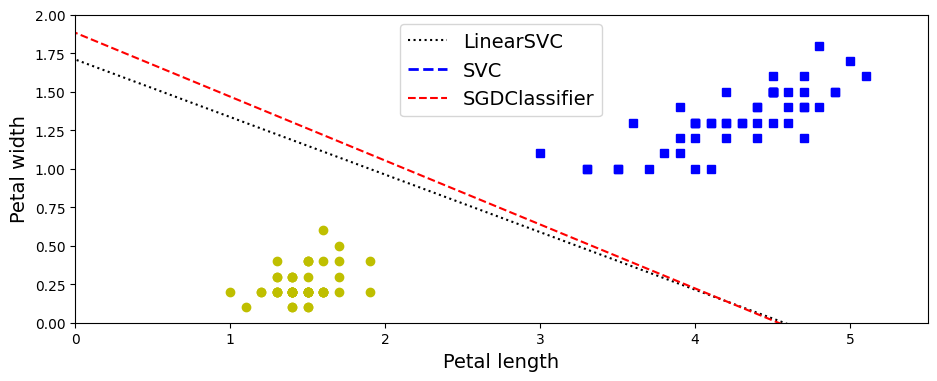

In [ ]:
# Plotting the decision boundaries of these three models
#Compute the slope and  bias of each decision boundaries
import matplotlib.pyplot as plt
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0,1] 
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0,0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0,1]
w3 = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

# Transforming the decision  boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1],[10, 10 *w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 +b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

#Plotting all the 3 decision boundaries
plt.figure(figsize=(11,4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r--", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # Label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"yo" ) # Label="Iris  setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [4]:
# Exercise 9: Train an SVM classifier on the MNIST dataset.Since the classifier are binary
# classifiers, you'll need to use one-vs-all to classify all 10 digits.You may want
# to tune the hyperparameters using small validation sets to speed up the process.What accuracy can you reach?

#  Note this excercise is skipped due to the time it will take to finish the program


In [5]:
# 10 , Train an SVM regressor on the california housing dataset
# Loading the dataset using Scikit-leanr's fetch_california_housing()
from sklearn.datasets import fetch_california_housing
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
# Training a simple LinearSVR first:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [11]:
# Seeing how it perform on the training set:
from sklearn.metrics  import mean_squared_error
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [13]:
import numpy as np
np.sqrt(mse)

np.float64(0.9819256687727764)

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection  import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma":reciprocal(0.001, 0.1), "C":uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3,random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   9.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  17.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  21.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  20.8s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  20.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  20.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  19.8s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  19.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  19.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  19.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  14.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001519B4D0F30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001519B4D0E20>},
                   random_state=42, verbose=2)

In [18]:
rnd_search_cv.best_estimator_

SVR(C=np.float64(4.745401188473625), gamma=np.float64(0.07969454818643935))

In [19]:
y_pred =  rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train ,y_pred)
np.sqrt(mse)

np.float64(0.5727456438057156)

In [20]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

np.float64(0.5929120979852832)